# <font color="CE4A06">Multiple Linear Regression With Healthcare Cost Dataset</span>
In the previous exercise, we build linear regression model for healthcare cost prediction using only a variable *age*.  
In this lesson, we will use multiple variables to create a linear regression model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression as lr
from sklearn import metrics

&nbsp;   
#### <font color="color:blue">**Read dataset**</span>

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/healthcare_cost.csv")
df.head()

,sex,age,bmi,nicotine_addict,district,healthcare_cost
0,female,21,27.900,yes,DT1,16884.92400
1,male,20,33.770,no,DT2,1725.55230
2,male,30,33.000,no,DT2,4449.46200
3,male,35,22.705,no,DT3,21984.47061
4,male,34,28.880,no,DT3,3866.85520


&nbsp;   
#### <font color="color:blue">**Adjust data type**</span>

In [3]:
df = df.astype({
    'sex': 'category',
    'nicotine_addict': 'category',
    'district': 'category'
})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   sex              1338 non-null   category
 1   age              1338 non-null   int64   
 2   bmi              1338 non-null   float64 
 3   nicotine_addict  1338 non-null   category
 4   district         1338 non-null   category
 5   healthcare_cost  1338 non-null   float64 
dtypes: category(3), float64(2), int64(1)
memory usage: 35.8 KB


&nbsp;   
#### <font color="color:blue">**Data groups**</span>

1.  nicotine_addict=yes, bmi \>= 30
2.  nicotine_addict=yes, bmi \< 30
3.  nicotine_addict=no

\
Let's focus on group 1

In [4]:
df_g1 = df.query('nicotine_addict == "yes" & bmi >= 30')
print(df_g1.shape)
df_g1.head(10)

(145, 6)


,sex,age,bmi,nicotine_addict,district,healthcare_cost
14,male,29,42.13,yes,DT2,39611.75770
19,male,32,35.30,yes,DT1,36837.46700
23,female,36,31.92,yes,DT4,37701.87680
29,male,33,36.30,yes,DT1,38711.00000
30,male,24,35.60,yes,DT1,35585.57600
34,male,30,36.40,yes,DT1,51194.55914
38,male,37,36.67,yes,DT4,39774.27630
39,male,62,39.90,yes,DT1,48173.36100
49,male,38,35.20,yes,DT2,38709.17600
53,male,38,34.43,yes,DT2,37742.57570


&nbsp;   
#### <font color="color:blue">**Removing outliers**</span>

<Axes: ylabel='healthcare_cost'>

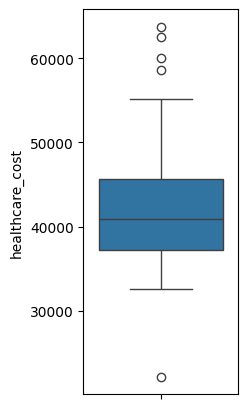

In [5]:
fig, ax = plt.subplots(figsize=(2, 5))  #set size of plot (width, height)
sns.boxplot(data=df_g1,
            y="healthcare_cost",
            whis=1.5,
            ax=ax)

In [6]:
q1, q3 = np.percentile(df_g1.healthcare_cost, [25, 75])
print("q1:", q1)
print("q3:", q3)
IQR = q3 - q1
print("IQR: ", IQR)
upper = df_g1.healthcare_cost[df_g1.healthcare_cost <= (q3 + 1.5*IQR)].max()
lower = df_g1.healthcare_cost[df_g1.healthcare_cost >= (q1 - 1.5*IQR)].min()
print("lower:",lower)
print("upper:",upper)

df_g1_remOut = df_g1[(df_g1.healthcare_cost < upper) &
                     (df_g1.healthcare_cost > lower)]
df_g1_remOut.shape

q1: 37165.1638
q3: 45702.02235
IQR:  8536.858549999997
lower: 32548.3405
upper: 55135.40209


(138, 6)

<Axes: ylabel='healthcare_cost'>

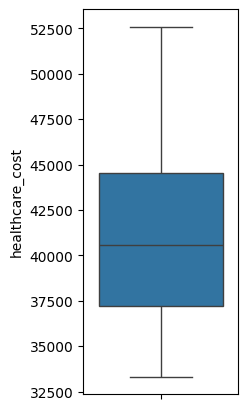

In [7]:
fig, ax = plt.subplots(figsize=(2, 5))  #set size of plot (width, height)
sns.boxplot(data=df_g1_remOut,
            y="healthcare_cost",
            whis=1.5,
            ax=ax)

&nbsp;   
#### <font color="1f7d02">*Create Multiple Linear Regression Model Using \'age\' & \'bmi'*</span>

In [8]:
X = df_g1_remOut.filter(['age','bmi'])
y = df_g1_remOut.filter(['healthcare_cost'])
model = lr(fit_intercept=True)
model.fit(X, y)

LinearRegression()

&nbsp;   
#### <font color="color:blue">**Perform prediction**</span>

In [9]:
y_pred = model.predict(X)

&nbsp;   
#### <font color="color:blue">**Get coefficients & intercept**</span>

In [10]:
print("coefficients:", model.coef_)
print("Intercept:", model.intercept_)

coefficients: [[270.48638381 461.9732308 ]]
Intercept: [13564.61900976]


&nbsp;   
#### <font color="color:blue">**Evaluate model performance**</span>

In [11]:
print('MAE:', metrics.mean_absolute_error(y, y_pred))
print('MSE:', metrics.mean_squared_error(y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('R2:', metrics.r2_score(y, y_pred))

MAE: 997.8856797043105
MSE: 3151353.3470678423
RMSE: 1775.2051563320342
R2: 0.8550541006143095


&nbsp;   
#### <font color="color:blue">**Plot observed (actual) vs. predicted healthcare_cost**</span>

,obs,predict
0,39611.7577,40871.656354
1,36837.4670,38527.838339
2,37701.8768,38048.314354
3,38711.0000,39260.297953
4,35585.5760,36502.539238


Text(47500, 35000, 'R2=0.86')

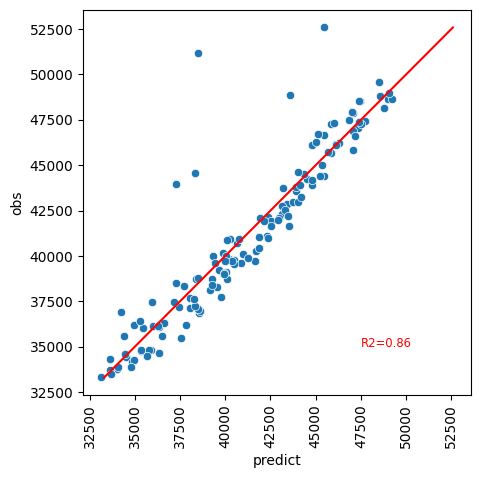

In [12]:
df_pred = pd.DataFrame({'obs': df_g1_remOut.healthcare_cost.values, 'predict': y_pred.reshape(1, -1)[0]})
display(df_pred.head())

fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df_pred,
               x='predict',
               y='obs',
               ax=ax)
plt.xticks(rotation=90)
diag = np.linspace(min(df_pred.obs), max(df_pred.obs))
plt.plot(diag,
         diag,
         color = 'r')

#Show R2 score in the plot
plt.text(47500, 35000, f"R2={metrics.r2_score(y, y_pred):.2f}", horizontalalignment='left', size='small', color='red')

&nbsp;  
#### <font color="1f7d02">*Create Multiple Linear Regression Model Using 'age', 'bmi', 'sex' and 'district'*</span>

The columns 'sex' and 'district' are categories.  
These data cannot be used directly to create model, it need to be converted first.  

One of the most common approaches to convert a categorical column to a numeric one is via one-hot encoding. In one-hot encoding, for every unique value in the original columns, a new column is created. For instance, for sex, two columns: 'female' and 'male', are created. If the original sex column contained male, a 1 is added in the newly created 'male' column, while 1 is added in the newly created 'female' column if the original sex column contained female.  

However, it can be noted that we do not really need two columns. A single column, i.e., 'male' is enough since when a customer is male, we can add 1 in the 'male' column, else 0 can be added in that column. Hence, <u>we need N-1 one-hot encoded columns for all the N values in the original column</u>.  

&nbsp;  
For 'sex' column, we create 1 one-hot encoded column.

In [13]:
pd.get_dummies(df_g1_remOut[['sex']], drop_first=True, dtype=int)

,sex_male
14,1
19,1
23,0
29,1
30,1
...,...
1291,1
1301,1
1308,0
1313,0


&nbsp;  
For 'district' column, we create 3 one-hot encoded columns.

In [14]:
pd.get_dummies(df_g1_remOut[['district']], drop_first=True, dtype=int)

,district_DT2,district_DT3,district_DT4
14,1,0,0
19,0,0,0
23,0,0,1
29,0,0,0
30,0,0,0
...,...,...,...
1291,0,0,0
1301,0,1,0
1308,0,0,0
1313,0,0,0


&nbsp;  
Create feature data (X)

In [15]:
X = pd.concat([df_g1_remOut[['age','bmi']],
               pd.get_dummies(df_g1_remOut[['sex']], drop_first=True, dtype=int),
               pd.get_dummies(df_g1_remOut[['district']], drop_first=True, dtype=int)],
              axis=1)
X

,age,bmi,sex_male,district_DT2,district_DT3,district_DT4
14,29,42.130,1,1,0,0
19,32,35.300,1,0,0,0
23,36,31.920,0,0,0,1
29,33,36.300,1,0,0,0
30,24,35.600,1,0,0,0
...,...,...,...,...,...,...
1291,21,34.900,1,0,0,0
1301,64,30.875,1,0,1,0
1308,27,30.200,0,0,0,0
1313,21,34.700,0,0,0,0


&nbsp;  
Create outcome data (y)

In [16]:
y = df_g1_remOut.filter(['healthcare_cost'])
y

,healthcare_cost
14,39611.75770
19,36837.46700
23,37701.87680
29,38711.00000
30,35585.57600
...,...
1291,34828.65400
1301,46718.16325
1308,33900.65300
1313,36397.57600


&nbsp;  
#### <font color="color:blue">**Create linear regression model**</span>

In [17]:
model = lr(fit_intercept=True)
model.fit(X, y)

LinearRegression()

&nbsp;  
#### <font color="color:blue">**Perform prediction**</span>

In [18]:
y_pred = model.predict(X)

&nbsp;  
#### <font color="color:blue">**Get coefficients & intercept**</span>

In [19]:
print("coefficients:", model.coef_)
print("Intercept:", model.intercept_)

coefficients: [[ 271.16550934  499.45781997 -329.70167015 -812.07271419  281.56984401
  -399.25346057]]
Intercept: [12779.54390273]


&nbsp;  
#### <font color="color:blue">**Evaluate model performance**</span>

In [20]:
print('MAE:', metrics.mean_absolute_error(y, y_pred))
print('MSE:', metrics.mean_squared_error(y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('R2:', metrics.r2_score(y, y_pred))

MAE: 977.3804735980383
MSE: 2962478.6803059964
RMSE: 1721.1852544993512
R2: 0.8637413550824384


&nbsp;  
#### <font color="color:blue">**Plot Actual vs. Predicted healthcare_cost**</span>

,obs,predict
0,39611.7577,40543.727244
1,36837.4670,38757.999576
2,37701.8768,38084.942392
3,38711.0000,39528.622906
4,35585.5760,36738.512848


Text(47500, 35000, 'R2=0.86')

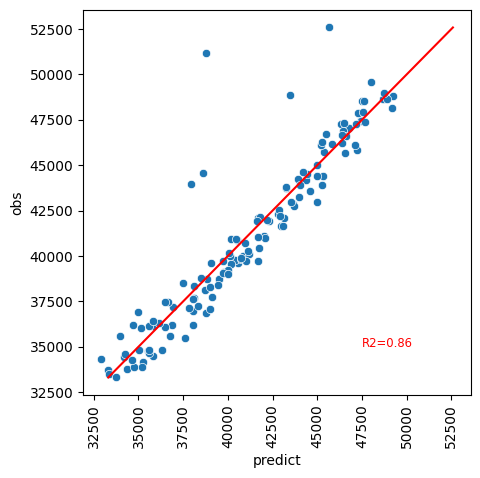

In [21]:
df_pred = pd.DataFrame({'obs': df_g1_remOut.healthcare_cost.values, 'predict': y_pred.reshape(1, -1)[0]})
display(df_pred.head())

fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df_pred,
               x='predict',
               y='obs',
               ax=ax)
plt.xticks(rotation=90)
diag = np.linspace(min(df_pred.obs), max(df_pred.obs))
plt.plot(diag,
         diag,
         color = 'r')

#Show R2 score in the plot
plt.text(47500, 35000, f"R2={metrics.r2_score(y, y_pred):.2f}", horizontalalignment='left', size='small', color='red')

&nbsp;  
#### <font color="color:blue">**Find p-values of coefficients using statmodels**</span>

In [22]:
import statsmodels.api as sm

X2 = sm.add_constant(X)
model_sm = sm.OLS(y,X2).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:        healthcare_cost   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     138.4
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           3.36e-54
Time:                        12:09:23   Log-Likelihood:                -1224.0
No. Observations:                 138   AIC:                             2462.
Df Residuals:                     131   BIC:                             2483.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.278e+04   1491.962      8.566   

\
Using only columns with p-value <= 0.05

In [23]:
X_sig = X.drop(['sex_male', 'district_DT3', 'district_DT4'], axis=1)
X_sig

,age,bmi,district_DT2
14,29,42.130,1
19,32,35.300,0
23,36,31.920,0
29,33,36.300,0
30,24,35.600,0
...,...,...,...
1291,21,34.900,0
1301,64,30.875,0
1308,27,30.200,0
1313,21,34.700,0


In [24]:
X2 = sm.add_constant(X_sig)
model_sm = sm.OLS(y,X2).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:        healthcare_cost   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     275.3
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           4.37e-57
Time:                        12:10:40   Log-Likelihood:                -1225.7
No. Observations:                 138   AIC:                             2459.
Df Residuals:                     134   BIC:                             2471.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.262e+04   1450.934      8.696   

---

&nbsp;  
#### <font color="C70039">Can we trust this result of model performance?</span>  
We created model based on whole dataset and then do predcition on the whole dataset again!  
This is *not* the proper way to evaluate model performance.

Generally, to evaluate model performance, **cross-validation (cv) techniques** are used. One of cv techniques that is simple and commonly used is hold-out method.  
  
In the hold-out method, the whole dataset is split into *train* and *test* sets. A model is built based on training set and then use this model to predict on test set. The model performance is evaluated based on observed and predicted outcome values of test set.  

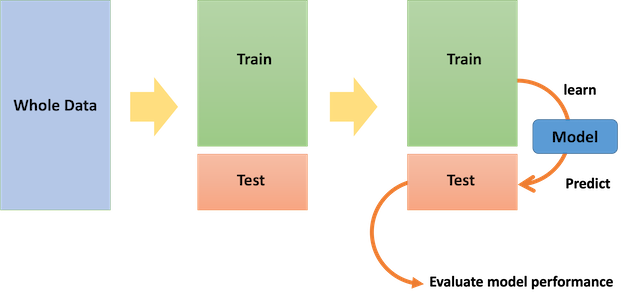

&nbsp;  
#### <font color="color:blue">**Create training & test sets**</span>

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3, # test 30% of whole data, train 70% of whole data
                                                    random_state=1)# random seed number

\
Training set:

In [26]:
X_train.shape

(96, 6)

In [27]:
y_train.shape

(96, 1)

&nbsp;  
Test set:

In [ ]:
X_test.shape

(42, 6)

In [ ]:
y_test.shape

(42, 1)

&nbsp;  
#### <font color="color:blue">**Create linear regression model based on training set**</span>

In [ ]:
model = lr(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

&nbsp;  
#### <font color="color:blue">**Perform prediction**</span>

- On training set

In [28]:
y_pred_train = model.predict(X_train)
y_pred_train.shape

(96, 1)

- On test set

In [29]:
y_pred_test = model.predict(X_test)
y_pred_test.shape

(42, 1)

&nbsp;  
#### <font color="color:blue">**Get coefficients & intercept**</span>

In [30]:
print("coefficients:", model.coef_)
print("Intercept:", model.intercept_)

coefficients: [[ 271.16550934  499.45781997 -329.70167015 -812.07271419  281.56984401
  -399.25346057]]
Intercept: [12779.54390273]


&nbsp;   
#### <font color="color:blue">**Evaluate model performance**</span>

- On training set

In [31]:
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('R2:', metrics.r2_score(y_train, y_pred_train))

MAE: 820.0082687758401
MSE: 1527016.2846855267
RMSE: 1235.7250036660773
R2: 0.9260845767916791


- On test set

In [32]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('R2:', metrics.r2_score(y_test, y_pred_test))

MAE: 1337.0883703344919
MSE: 6243535.584581358
RMSE: 2498.706782433937
R2: 0.7418241781318763


&nbsp;  
#### <font color="color:blue">**Plot Actual vs. Predicted healthcare_cost**</span>

- On training set

,obs,predict
0,37165.16380,36935.344930
1,37701.87680,38084.942392
2,39983.42595,40128.246542
3,41034.22140,41714.082078
4,39774.27630,40398.830876


Text(47500, 35000, 'R2=0.93')

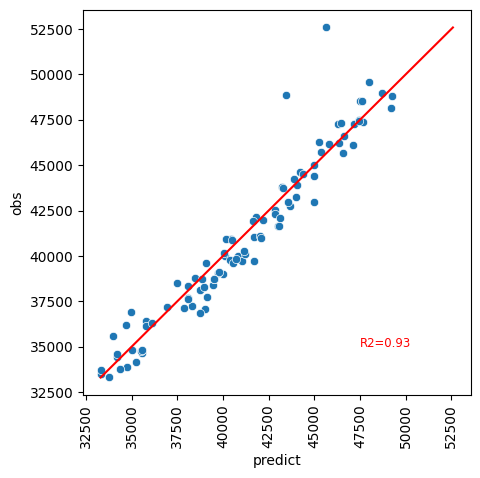

In [33]:
df_pred = pd.DataFrame({'obs': y_train.values.reshape(1, -1)[0], 'predict': y_pred_train.reshape(1, -1)[0]})
display(df_pred.head())

fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df_pred,
               x='predict',
               y='obs',
               ax=ax)
plt.xticks(rotation=90)
diag = np.linspace(min(df_pred.obs), max(df_pred.obs))
plt.plot(diag,
         diag,
         color = 'r')

#Show R2 score in the plot
plt.text(47500, 35000, f"R2={metrics.r2_score(y_train, y_pred_train):.2f}", horizontalalignment='left', size='small', color='red')

- On test set

,obs,predict
0,44423.8030,45325.312377
1,41949.2441,41627.439276
2,46889.2612,46606.340712
3,42560.4304,42852.873446
4,34779.6150,34984.820529


Text(47500, 35000, 'R2=0.79')

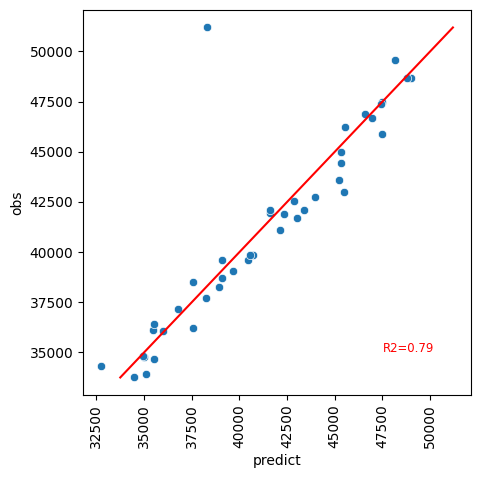

In [36]:
df_pred = pd.DataFrame({'obs': y_test.values.reshape(1, -1)[0], 'predict': y_pred_test.reshape(1, -1)[0]})
display(df_pred.head())

fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df_pred,
               x='predict',
               y='obs',
               ax=ax)
plt.xticks(rotation=90)
diag = np.linspace(min(df_pred.obs), max(df_pred.obs))
plt.plot(diag,
         diag,
         color = 'r')

#Show R2 score in the plot
plt.text(47500, 35000, f"R2={metrics.r2_score(y_test, y_pred_test):.2f}", horizontalalignment='left', size='small', color='red')

&nbsp;  
#### <font color="color:blue">**If we change the 'random_state' argument**</span>

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=2)# change from 1 to 2
model = lr(fit_intercept=True)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_train.shape

y_pred_test = model.predict(X_test)
y_pred_test.shape

print("coefficients:", model.coef_)
print("Intercept:", model.intercept_)

print("\n---Training---")
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('R2:', metrics.r2_score(y_train, y_pred_train))

print("\n---Test---")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('R2:', metrics.r2_score(y_test, y_pred_test))

coefficients: [[ 278.00076116  498.69586565 -562.69997338 -429.71387286  932.85125266
   -14.63583221]]
Intercept: [12354.88839351]

---Training---
MAE: 936.6489864202849
MSE: 2262172.6797853387
RMSE: 1504.0520867926546
R2: 0.8938023170787366

---Test---
MAE: 1038.7733644874347
MSE: 4797406.874289237
RMSE: 2190.298352802475
R2: 0.7889674301093035


&nbsp;  
#### <font color="1f7d02">*Comparison of Linear Regression Models*</span>

Now, we will compare 3 models **based on prediction performance of test set**:
1. Model using age only
2. Model using age + bmi
3. Model using age + bmi + sex + district

&nbsp;  
Re-create feature and outcome data:

In [37]:
X = pd.concat([df_g1_remOut[['age','bmi']],
               pd.get_dummies(df_g1_remOut[['sex']], drop_first=True),
               pd.get_dummies(df_g1_remOut[['district']], drop_first=True)],
              axis=1)
X

,age,bmi,sex_male,district_DT2,district_DT3,district_DT4
14,29,42.130,True,True,False,False
19,32,35.300,True,False,False,False
23,36,31.920,False,False,False,True
29,33,36.300,True,False,False,False
30,24,35.600,True,False,False,False
...,...,...,...,...,...,...
1291,21,34.900,True,False,False,False
1301,64,30.875,True,False,True,False
1308,27,30.200,False,False,False,False
1313,21,34.700,False,False,False,False


In [38]:
y = df_g1_remOut.filter(['healthcare_cost'])
y

,healthcare_cost
14,39611.75770
19,36837.46700
23,37701.87680
29,38711.00000
30,35585.57600
...,...
1291,34828.65400
1301,46718.16325
1308,33900.65300
1313,36397.57600


&nbsp;  
#### <font color="color:blue">**1. Model using age only**</span>

In [44]:
X1 = X.filter(['age'])
X1.head()

,age
14,29
19,32
23,36
29,33
30,24


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X1,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1)
model = lr(fit_intercept=True)
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('R2:', metrics.r2_score(y_test, y_pred_test))

MAE: 2152.0591794048078
MSE: 9635985.885412404
RMSE: 3104.1884423166716
R2: 0.6015433015838576


\
Perform train-test split 100 times using 'random_state' from 0 to 99 and then collect performance results.

In [46]:
perf_res = {}
perf_res['MAE']=[]
perf_res['MSE']=[]
perf_res['RMSE']=[]
perf_res['R2']=[]

for rs in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X1,
                                                        y,
                                                        test_size=0.3,
                                                        random_state=rs)
    model = lr(fit_intercept=True)
    model.fit(X_train, y_train)

    y_pred_test = model.predict(X_test)

    perf_res['MAE'].append(metrics.mean_absolute_error(y_test, y_pred_test))
    perf_res['MSE'].append(metrics.mean_squared_error(y_test, y_pred_test))
    perf_res['RMSE'].append(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
    perf_res['R2'].append(metrics.r2_score(y_test, y_pred_test))

perf1 = pd.DataFrame(perf_res)
perf1

,MAE,MSE,RMSE,R2
0,1831.976177,5.662115e+06,2379.519978,0.722544
1,2152.059179,9.635986e+06,3104.188442,0.601543
2,1951.986284,7.867508e+06,2804.907862,0.653917
3,1889.675891,8.622962e+06,2936.488091,0.491164
4,1964.972311,9.625379e+06,3102.479469,0.513835
...,...,...,...,...
95,1798.601476,5.211360e+06,2282.840330,0.759903
96,2578.195481,1.211843e+07,3481.153480,0.395405
97,1953.067044,6.010679e+06,2451.668599,0.745665
98,1936.004461,5.825552e+06,2413.618068,0.675886


\
If we use describe(), we can see that ranges from max to min values and stds are large.

In [47]:
perf1.describe()

,MAE,MSE,RMSE,R2
count,100.000000,1.000000e+02,100.000000,100.000000
mean,1998.499620,7.165596e+06,2644.734816,0.662337
std,209.604911,2.225948e+06,415.572762,0.108281
min,1428.508345,2.965123e+06,1721.953179,0.389762
25%,1863.748767,5.378981e+06,2319.249572,0.592265
50%,1986.623198,6.826820e+06,2612.765807,0.664630
75%,2143.365129,8.751797e+06,2958.343064,0.750382
max,2578.195481,1.257342e+07,3545.902236,0.861374


\
Let's focus on R2.

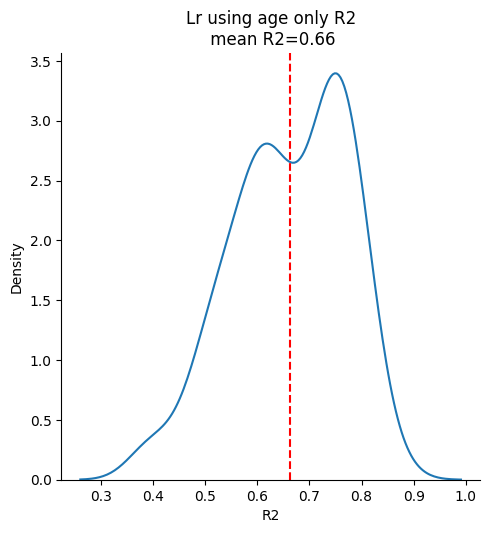

In [48]:
sns.displot(perf1.R2, kind='kde')
plt.title(f"Lr using age only R2\n mean R2={perf1.R2.mean():.2f}")
plt.axvline(perf1.R2.mean(), c='r', ls='--')

In [49]:
stats.shapiro(perf1.R2)

ShapiroResult(statistic=0.9594780106980046, pvalue=0.003691587110373837)

Shapiros's p-value < 0.05, indicates that R2 values are not normally distributed.

&nbsp;  
#### <font color="color:blue">**2. Model using age + bmi**</span>

In [50]:
X2 = X.filter(['age', 'bmi'])
X2.head()

,age,bmi
14,29,42.13
19,32,35.30
23,36,31.92
29,33,36.30
30,24,35.60


\
Perform train-test split 100 times using 'random_state' from 0 to 99 and then collect performance results.

In [51]:
perf_res = {}
perf_res['MAE']=[]
perf_res['MSE']=[]
perf_res['RMSE']=[]
perf_res['R2']=[]

for rs in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X2,
                                                        y,
                                                        test_size=0.3,
                                                        random_state=rs)
    model = lr(fit_intercept=True)
    model.fit(X_train, y_train)

    y_pred_test = model.predict(X_test)

    perf_res['MAE'].append(metrics.mean_absolute_error(y_test, y_pred_test))
    perf_res['MSE'].append(metrics.mean_squared_error(y_test, y_pred_test))
    perf_res['RMSE'].append(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
    perf_res['R2'].append(metrics.r2_score(y_test, y_pred_test))

perf2 = pd.DataFrame(perf_res)
perf2

,MAE,MSE,RMSE,R2
0,754.487101,8.147029e+05,902.608926,0.960078
1,1359.503533,6.897340e+06,2626.278722,0.714789
2,1039.627686,4.650231e+06,2156.439428,0.795442
3,1331.899768,7.005166e+06,2646.727379,0.586629
4,1130.699298,5.625407e+06,2371.794018,0.715868
...,...,...,...,...
95,1184.371734,3.271884e+06,1808.834861,0.849259
96,1262.948701,5.718883e+06,2391.418526,0.714682
97,1119.505102,3.772444e+06,1942.278114,0.840373
98,1256.806841,3.763477e+06,1939.968384,0.790613


In [52]:
perf2.describe()

,MAE,MSE,RMSE,R2
count,100.000000,1.000000e+02,100.000000,100.000000
mean,1061.627204,3.601611e+06,1823.564105,0.832196
std,169.377418,1.911543e+06,528.219075,0.088683
min,689.453762,7.002629e+05,836.817107,0.586629
25%,969.733539,2.026682e+06,1423.606279,0.767575
50%,1056.849901,3.172067e+06,1780.876823,0.843030
75%,1169.162481,4.972025e+06,2229.801753,0.897929
max,1430.438384,8.105426e+06,2847.003068,0.969422


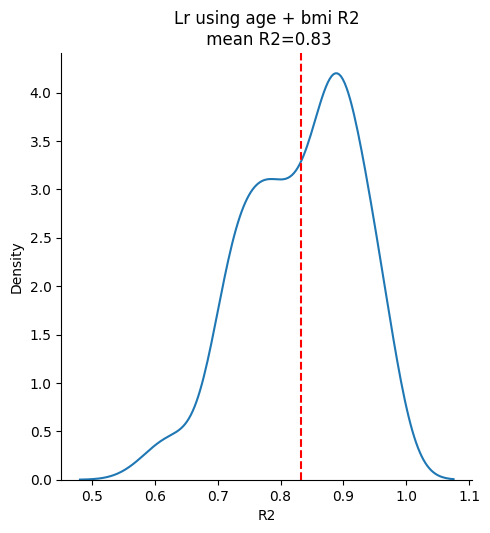

In [53]:
sns.displot(perf2.R2, kind='kde')
plt.title(f"Lr using age + bmi R2\n mean R2={perf2.R2.mean():.2f}")
plt.axvline(perf2.R2.mean(), c='r', ls='--')

In [54]:
stats.shapiro(perf2.R2)

ShapiroResult(statistic=0.9579151109742621, pvalue=0.002863635411046733)

Shapiros's p-value < 0.05, indicates that R2 values are not normally distributed.

&nbsp;  
#### <font color="color:blue">**3. Model using age + bmi + sex + district**</span>

In [55]:
X3 = X
X3.head()

,age,bmi,sex_male,district_DT2,district_DT3,district_DT4
14,29,42.13,True,True,False,False
19,32,35.30,True,False,False,False
23,36,31.92,False,False,False,True
29,33,36.30,True,False,False,False
30,24,35.60,True,False,False,False


\
Perform train-test split 100 times using 'random_state' from 0 to 99 and then collect performance results.

In [56]:
perf_res = {}
perf_res['MAE']=[]
perf_res['MSE']=[]
perf_res['RMSE']=[]
perf_res['R2']=[]

for rs in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X3,
                                                        y,
                                                        test_size=0.3,
                                                        random_state=rs)
    model = lr(fit_intercept=True)
    model.fit(X_train, y_train)

    y_pred_test = model.predict(X_test)

    perf_res['MAE'].append(metrics.mean_absolute_error(y_test, y_pred_test))
    perf_res['MSE'].append(metrics.mean_squared_error(y_test, y_pred_test))
    perf_res['RMSE'].append(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
    perf_res['R2'].append(metrics.r2_score(y_test, y_pred_test))

perf3 = pd.DataFrame(perf_res)
perf3

,MAE,MSE,RMSE,R2
0,711.950340,8.280892e+05,909.994053,0.959422
1,1314.818582,6.782855e+06,2604.391573,0.719523
2,1038.773364,4.797407e+06,2190.298353,0.788967
3,1317.295115,6.852169e+06,2617.664803,0.595657
4,1165.140349,5.858707e+06,2420.476584,0.704085
...,...,...,...,...
95,1076.490632,3.031349e+06,1741.076936,0.860340
96,1201.579930,5.438299e+06,2332.016120,0.728680
97,1241.082874,3.879166e+06,1969.559885,0.835857
98,1378.099491,3.987049e+06,1996.759699,0.778174


In [ ]:
perf3.describe()

,MAE,MSE,RMSE,R2
count,100.000000,1.000000e+02,100.000000,100.000000
mean,1067.669469,3.616389e+06,1830.656602,0.831600
std,167.478970,1.898813e+06,517.458528,0.088079
min,711.950340,7.206094e+05,848.887171,0.584148
25%,959.992908,2.059403e+06,1435.047072,0.770724
50%,1068.650131,3.059316e+06,1749.089872,0.848898
75%,1166.260669,4.930103e+06,2220.379035,0.895836
max,1433.137379,8.286566e+06,2878.639684,0.966310


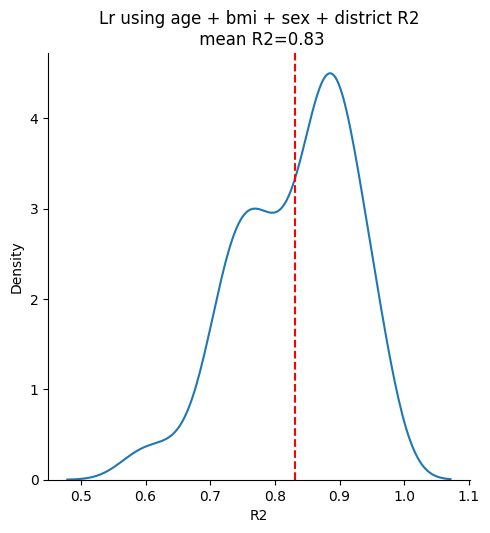

In [ ]:
sns.displot(perf3.R2, kind='kde')
plt.title(f"Lr using age + bmi + sex + district R2\n mean R2={perf3.R2.mean():.2f}")
plt.axvline(perf3.R2.mean(), c='r', ls='--')

In [59]:
stats.shapiro(perf2.R2)

ShapiroResult(statistic=0.9579151109742621, pvalue=0.002863635411046733)

Shapiros's p-value < 0.05, indicates that R2 values are not normally distributed.

&nbsp;  
#### <font color="color:blue">**Compare all 3 R<sup>2</sup>s**</span>

\
Create dataframe for visualization:

In [60]:
df_R2s = pd.DataFrame({'Model1':perf1.R2,
                       'Model2':perf2.R2,
                       'Model3':perf3.R2
                      })
df_R2s_long = df_R2s.melt(value_vars=['Model1', 'Model2', 'Model3'],
                          value_name='R2',
                          var_name='Model')
df_R2s_long

,Model,R2
0,Model1,0.722544
1,Model1,0.601543
2,Model1,0.653917
3,Model1,0.491164
4,Model1,0.513835
...,...,...
295,Model3,0.860340
296,Model3,0.728680
297,Model3,0.835857
298,Model3,0.778174


\
Plot pdf:

Text(0.5, 1.0, 'R2 Model1=0.66, Model2=0.83, Model3=0.83')

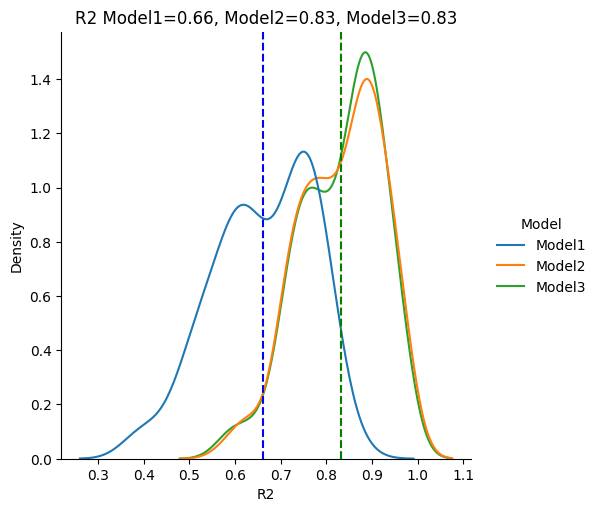

In [61]:
sns.displot(data=df_R2s_long,
            x='R2',
            kind='kde',
            hue='Model')
plt.axvline(df_R2s.Model1.mean(), c='b', ls='--')
plt.axvline(df_R2s.Model2.mean(), c='orange', ls='--')
plt.axvline(df_R2s.Model3.mean(), c='g', ls='--')
plt.title(f"R2 Model1={df_R2s.Model1.mean():.2f}, Model2={df_R2s.Model2.mean():.2f}, Model3={df_R2s.Model3.mean():.2f}")

<Axes: xlabel='Model', ylabel='R2'>

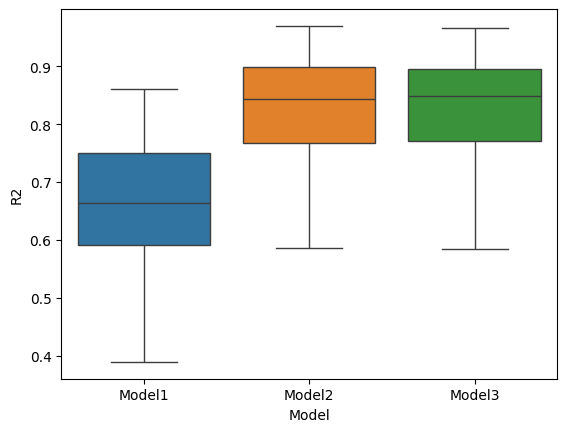

In [62]:
sns.boxplot(data=df_R2s_long,
              x='Model',
              y='R2',
              hue='Model')

&nbsp;  
#### <font color="color:blue">**Test of R2 means**</span>

Since all 3 data are not normally distributed, we will perform Kruskal–Wallis one-way analysis.

H<sub>0</sub>: there is no difference in the R2 means resulting from using model1, model2, or model3.  
H<sub>A</sub>: there is difference in the R2 means resulting from using model1, model2, or model3.

In [63]:
f_score, p_value = stats.kruskal(df_R2s.Model1, df_R2s.Model2, df_R2s.Model3)
print("p-value:", p_value)

p-value: 7.696931324736714e-26


p-value < 0.05, there is difference in the R2 means.

\
**Post hoc test**

In [65]:
%pip install scikit_posthocs

In [66]:
import scikit_posthocs as sp
sp.posthoc_conover(df_R2s_long, val_col='R2', group_col='Model')

,Model1,Model2,Model3
Model1,1.000000e+00,7.234573e-27,9.874036e-27
Model2,7.234573e-27,1.000000e+00,9.694056e-01
Model3,9.874036e-27,9.694056e-01,1.000000e+00
